# Ejercicio de programación Regresión Lineal Multiple

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.preprocessing import LabelEncoder

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa.

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [3]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = pd.read_csv('/content/gdrive/MyDrive/SIS420/Laboratorio1/bsas_realstate_on_sale_properati_dataset_2020.csv')
#print(data)
#data.info()

Elimine las columnas por los siguientes motivos

"title" y "descripcion" parrafos de texto(deveria ser una sola palabra)

"currency","l1" y "operation_type" porque solo es un mismo dato en todos los ejemplos

"created_on" porque son los mismos datos que de "star_end"

"start_date" y "end_date" porque las fechas en las que se publico la venta no afecta mucho al precio de la propiedad

In [4]:
#Eliminamos las columnas no tan importantes
columnas_eliminadas= ['l1','start_date','end_date','currency','operation_type','created_on','title','description']
data.drop(columnas_eliminadas, axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              136735 non-null  float64
 1   lon              136701 non-null  float64
 2   l2               146660 non-null  object 
 3   l3               146660 non-null  object 
 4   rooms            146660 non-null  float64
 5   bedrooms         146660 non-null  float64
 6   bathrooms        140703 non-null  float64
 7   surface_total    126133 non-null  float64
 8   surface_covered  125046 non-null  float64
 9   price            146660 non-null  float64
 10  property_type    146660 non-null  object 
dtypes: float64(8), object(3)
memory usage: 12.3+ MB


In [6]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [7]:
print(data)
data.info()

              lat        lon  l2  l3  rooms  bedrooms  bathrooms  \
0      -34.605880 -58.384949   3  63    7.0       7.0        2.0   
1      -34.624056 -58.412110   3  11    2.0       1.0        2.0   
2      -34.593569 -58.427474   3  48    2.0       1.0        1.0   
3      -34.581294 -58.436754   3  48    2.0       1.0        1.0   
4      -34.914194 -57.938219   2  33    2.0       1.0        1.0   
...           ...        ...  ..  ..    ...       ...        ...   
146655 -34.816348 -58.181963   2   9    2.0       1.0        1.0   
146656 -34.446459 -58.937810   0  55    4.0       3.0        2.0   
146657 -34.444633 -58.981606   0  55    1.0       1.0        1.0   
146658 -34.444830 -58.981796   0  55    2.0       1.0        1.0   
146659 -34.444760 -58.981885   0  55    3.0       2.0        1.0   

        surface_total  surface_covered     price  property_type  
0               140.0            140.0  153000.0              3  
1                70.0             58.0  159000.0   

In [8]:
#llenar datos vacios
columnas_especificas = ['lat','lon','bathrooms','surface_total','surface_covered']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              146660 non-null  float64
 1   lon              146660 non-null  float64
 2   l2               146660 non-null  int64  
 3   l3               146660 non-null  int64  
 4   rooms            146660 non-null  float64
 5   bedrooms         146660 non-null  float64
 6   bathrooms        146660 non-null  float64
 7   surface_total    146660 non-null  float64
 8   surface_covered  146660 non-null  float64
 9   price            146660 non-null  float64
 10  property_type    146660 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 12.3 MB


In [9]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,10]]
y = data.iloc[:,9]

m = y.size
print(m)
# imprimir algunos puntos de datos
X.info()

146660
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              146660 non-null  float64
 1   lon              146660 non-null  float64
 2   l2               146660 non-null  int64  
 3   l3               146660 non-null  int64  
 4   rooms            146660 non-null  float64
 5   bedrooms         146660 non-null  float64
 6   bathrooms        146660 non-null  float64
 7   surface_total    146660 non-null  float64
 8   surface_covered  146660 non-null  float64
 9   property_type    146660 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 11.2 MB


In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

              lat        lon  l2  l3  rooms  bedrooms  bathrooms  \
0      -34.605880 -58.384949   3  63    7.0       7.0        2.0   
1      -34.624056 -58.412110   3  11    2.0       1.0        2.0   
2      -34.593569 -58.427474   3  48    2.0       1.0        1.0   
3      -34.581294 -58.436754   3  48    2.0       1.0        1.0   
4      -34.914194 -57.938219   2  33    2.0       1.0        1.0   
...           ...        ...  ..  ..    ...       ...        ...   
146655 -34.816348 -58.181963   2   9    2.0       1.0        1.0   
146656 -34.446459 -58.937810   0  55    4.0       3.0        2.0   
146657 -34.444633 -58.981606   0  55    1.0       1.0        1.0   
146658 -34.444830 -58.981796   0  55    2.0       1.0        1.0   
146659 -34.444760 -58.981885   0  55    3.0       2.0        1.0   

        surface_total  surface_covered  property_type  
0               140.0            140.0              3  
1                70.0             58.0              9  
2              

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [12]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [13]:
print(X)

[[ 1.00000000e+00 -2.17438749e-03  1.71189170e-01 ... -4.06814148e-02
   3.21071699e-02 -9.02483151e-02]
 [ 1.00000000e+00 -4.23597439e-02  1.13324560e-01 ... -7.77256719e-02
  -6.47506402e-02  2.58590694e+00]
 [ 1.00000000e+00  2.50438855e-02  8.05931805e-02 ... -9.09557638e-02
  -8.01061467e-02  2.58590694e+00]
 ...
 [ 1.00000000e+00  3.54329733e-01 -1.09994212e+00 ... -8.83097454e-02
  -9.19180748e-02 -9.02483151e-02]
 [ 1.00000000e+00  3.53894207e-01 -1.10034690e+00 ... -9.46601895e-02
  -8.83744963e-02 -9.02483151e-02]
 [ 1.00000000e+00  3.54050519e-01 -1.10053736e+00 ... -7.50796536e-02
  -4.46703625e-02 -9.02483151e-02]]


In [14]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [15]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [221432.82381552   8517.6467316    7864.00044631  29515.94985478
  15185.36982769  34619.50326471  14644.05307795 116718.75068536
   1368.1643792    3487.11770948   -258.8176646 ]
El precio predecido para una propiedad con las siguientes caracteristicas: ubicacion; provincia; ciudad;cantidad de ambientes; dormitorios;baño; superficie total; superficie cubierta y tipo de propiedad (usando el descenso por el gradiente): $468194


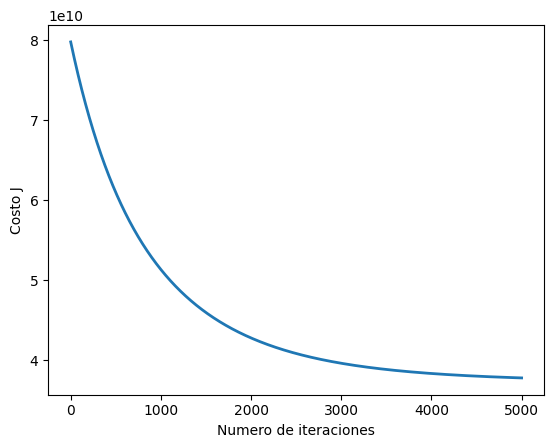

In [33]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0005 # alpha = 0.003
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, -34.605880, -58.384949, 3, 63, 7, 7, 2, 140, 140, 3]
#X_array = [1, -34.624056, -58.412110, 3, 11, 2, 1, 2, 70, 58, 9]
#X_array = [1, -34.593569, -58.427474, 3, 48, 2, 1, 1, 45, 45, 9]
#X_array = [1, -34.581294, -58.436754, 3, 48, 2, 1, 1, 85, 50, 9]
X_array[1:11] = (X_array[1:11] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una propiedad con las siguientes caracteristicas: ubicacion; provincia; ciudad;cantidad de ambientes; dormitorios;'
'baño; superficie total; superficie cubierta y tipo de propiedad (usando el descenso por el gradiente): ${:.0f}'.format(price))

<a id="section7"></a>
### Ecuacion de la Normal



In [30]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [31]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 34.605880, 58.384949, 3, 63, 7, 7, 2, 140, 140, 3]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 2.41221080e+05  1.32766463e+05  1.32537553e+05  2.56118603e+04
  1.75845944e+04  4.94679555e+04 -2.07106405e+04  1.43016629e+05
  3.26550948e+03  2.74700972e+03  2.39588088e+02]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $15088391
